In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline


nc_filename=glob.glob('/ocean/xiaoxiny/research/result_jasper/*_ptrc_T*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/Off_1y_20020101_20021231_ptrc_T.nc', '/ocean/xiaoxiny/research/result_jasper/CindyOff_1d_20100101_20100101_ptrc_T.nc', '/ocean/xiaoxiny/research/result_jasper/Off_1m_20020101_20020201_ptrc_T.nc', '/ocean/xiaoxiny/research/result_jasper/Off_1m_20020101_20021231_ptrc_T.nc']


In [2]:
ptrc=nc.Dataset(nc_filename[1])
ptrc.variables

OrderedDict([(u'nav_lon', <netCDF4.Variable at 0x7f9fec719d60>),
             (u'nav_lat', <netCDF4.Variable at 0x7f9fec719df8>),
             (u'deptht', <netCDF4.Variable at 0x7f9fec719e90>),
             (u'time_counter', <netCDF4.Variable at 0x7f9fec719f28>),
             (u'time_counter_bnds', <netCDF4.Variable at 0x7f9feba1d050>),
             (u'TR_7', <netCDF4.Variable at 0x7f9feba1d0e8>),
             (u'TR_8', <netCDF4.Variable at 0x7f9feba1d180>),
             (u'TR_9', <netCDF4.Variable at 0x7f9feba1d218>),
             (u'TR_10', <netCDF4.Variable at 0x7f9feba1d2b0>)])

In [3]:
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]
TR_9=ptrc.variables['TR_9'][:]
TR_8=ptrc.variables['TR_8'][:]
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_7=np.ma.masked_where(TR_7>= 1, TR_7)
TR_8=np.ma.masked_where(TR_8>= 1, TR_8)
TR_9=np.ma.masked_where(TR_9>= 1, TR_9)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
#ice=ptrc.variables['ice_cover'][:]
#u=ptrc.variables['uoce'][:]
#v=ptrc.variables['voce'][:]
#w=ptrc.variables['woce'][:]

lonlim=[-180, 180]
latlim=[-78, 89]
print TR_7.shape
print nav_lat.shape

(1, 50, 800, 544)
(800, 544)


In [4]:
TR_7[0,2,:,:]

masked_array(data =
 [[0.00027190998662263155 0.00027392993797548115 0.00027596528525464237 ...,
  0.0020420276559889317 0.0020432076416909695 0.0020443699322640896]
 [0.0002719995391089469 0.00027401934494264424 0.0002760545758064836 ...,
  0.002042090520262718 0.0020432707387953997 0.0020444330293685198]
 [0.00027208952815271914 0.00027410921757109463 0.00027614430291578174 ...,
  0.0020421536173671484 0.0020433340687304735 0.0020444965921342373]
 ..., 
 [0.00026553141651675105 0.00026456412160769105 0.0002636077697388828 ...,
  0.001758266007527709 0.0017610242357477546 0.001763771055266261]
 [0.00026513836928643286 0.00026416953187435865 0.0002632116957101971 ...,
  0.0017571691423654556 0.0017599386628717184 0.001762696891091764]
 [0.00026474654441699386 0.00026377616450190544 0.00026281681493856013 ...,
  0.0017560820560902357 0.0017588628688827157 0.001761632040143013]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]


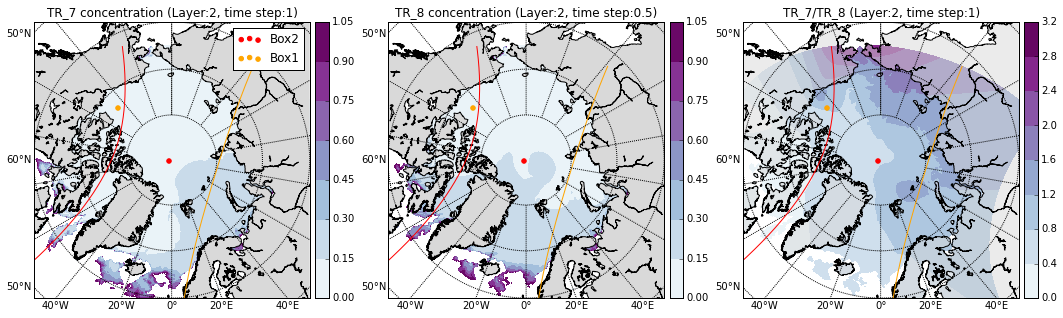

In [12]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(133)
# Some 2D arrays to plot (time,x,y)
data=TR_7#/1e6
data2=TR_8#/1e6
i=0
layer=2

#mask data in fram strait
#for k in range(len(nav_lon[:,0])):
#    for j in range(len(nav_lon[0,:])):
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data2[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]<=0) and (nav_lon[k,j]>=-20):
#            data[i,layer,k,j]=np.ma.masked
#        if (nav_lon[k,j]>=0) and (nav_lon[k,j]<=20):
#            data[i,layer,k,j]=np.ma.masked

m = Basemap(projection='npstere',boundinglat=60,lon_0=-0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
cs=m.contourf(x,y,data[i,layer,:,:]/data2[i,layer,:,:],cmap=plt.cm.BuPu)    
plt.title('TR_7/TR_8 (Layer:%s, time step:%s)'%(layer,i+1))
m.scatter(x[600,300],y[600,300],color='red',label='Box2')
m.plot(x[:,183],y[:,183],color='red')
m.plot(x[:,396],y[:,396],color='orange')
m.scatter(x[685,170],y[685,170],color='orange',label='Box1')
cbar = m.colorbar(cs,location='right',pad="2%")


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(131)
m = Basemap(projection='npstere',boundinglat=60,lon_0=-0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x, y = m(nav_lon, nav_lat)
#cs=m.contourf(x,y,ice[i,:,:],cmap=plt.cm.bone)
cs=m.contourf(x,y,data[i,layer,:,:],cmap=plt.cm.BuPu)  
cbar = m.colorbar(cs,location='right',pad="2%")
m.scatter(x[600,300],y[600,300],color='red',label='Box2')
m.plot(x[:,183],y[:,183],color='red')
m.plot(x[:,396],y[:,396],color='orange')
m.scatter(x[685,170],y[685,170],color='orange',label='Box1')
plt.legend()
plt.title('TR_7 concentration (Layer:%s, time step:%s)'%(layer,i+1))


#fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(132)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-90.,90.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0, 0, 0, 1],zorder=3)
x, y = m(nav_lon, nav_lat)

cs=m.contourf(x,y,data2[i,layer,:,:],cmap=plt.cm.BuPu)
cbar = m.colorbar(cs,location='right',pad="2%")
m.scatter(x[600,300],y[600,300],color='red',label='Box2')
m.plot(x[:,183],y[:,183],color='red')
m.plot(x[:,396],y[:,396],color='orange')
m.scatter(x[685,170],y[685,170],color='orange',label='Box1')
plt.title('TR_8 concentration (Layer:%s, time step:%s)'%(layer,i+0.5))
#Q=m.quiver(x, y, u[i,layer,:,:], v[i,layer,:,:],scale=0.8)
  #smaller the number, longer the line
#Qlabel=plt.quiverkey(Q, 0.15, 0.1, 0.03, '0.03 m/s', labelpos='N') # width, height, scale, label, position
#ax.set_title('currents (Layer=95m, Time=1)', fontsize=12)

pl.show()

The left side of the red line is box1. The middle is box 2. The right hand side of the orange line is box3.

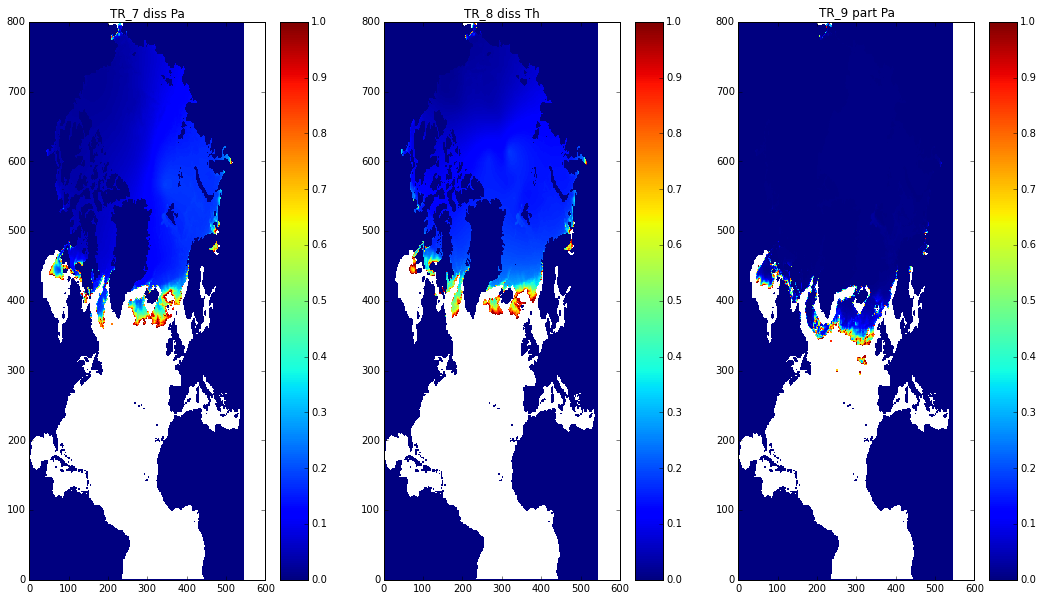

In [6]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(131)
plt.pcolor(TR_7[0,2,:,:])
plt.colorbar()
plt.title('TR_7 diss Pa')
plt.clim([0,1])

ax = fig.add_subplot(132)
plt.pcolor(TR_8[0,2,:,:])
plt.colorbar()
plt.title('TR_8 diss Th')
plt.clim([0,1])

ax = fig.add_subplot(133)
plt.pcolor(TR_9[0,2,:,:])
plt.colorbar()
plt.title('TR_9 part Pa')
plt.clim([0,1])

plt.show()